<a href="https://colab.research.google.com/github/Tasfia48/Predictive_Policing/blob/master/Stop_and_Crime_Data_beatwise_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


###List of Police beats in chicago city

In [ ]:
df_beat = pd.read_csv('/content/drive/My Drive/CPD/Crime data/PoliceBeatDec2012.csv')
df_beat.head()

,the_geom,DISTRICT,SECTOR,BEAT,BEAT_NUM
0,MULTIPOLYGON (((-87.7047252651434 41.975774430...,17,1,1,1713
1,MULTIPOLYGON (((-87.83365455041093 41.97535481...,31,0,0,3100
2,MULTIPOLYGON (((-87.90684167275818 41.97656175...,16,5,5,1651
3,MULTIPOLYGON (((-87.64491798475646 41.96972709...,19,1,1,1914
4,MULTIPOLYGON (((-87.63724132684592 41.96598776...,19,1,1,1915


### Load Stop data, year 2017-2019

In [ ]:
df = pd.read_csv('/content/drive/My Drive/CPD/Stop Data/StopData(2017-2019).csv')

In [ ]:
df['CONTACT_DATE']=pd.to_datetime(df['CONTACT_DATE'])
df= df[['CONTACT_DATE','SECTOR','BEAT','DISTRICT','Year',	'Month']]
df.head()

,CONTACT_DATE,SECTOR,BEAT,DISTRICT,Year,Month
0,2017-01-01 00:15:00,202,2024,20,2017,1
1,2017-01-01 00:45:00,192,1924,19,2017,1
2,2017-01-01 01:03:00,22,225,2,2017,1
3,2017-01-01 01:06:00,222,2223,22,2017,1
4,2017-01-01 01:17:00,101,1012,10,2017,1


###Creating timeseries of Stop Data for Each beat 


In [ ]:
def groupList(df,B_no):
  df_one = df[df['BEAT'] == B_no]
  df_one = df_one.groupby(['Year','Month']).count().reset_index()
  df_one = df_one.rename(columns={'BEAT' :'count'})
  temp= df_one['count'].values.tolist()
  return temp

In [ ]:
stop_timeseries = dict()
for x in df["BEAT"].unique():
  stop_timeseries[x]=groupList(df,x)

### Load Crime Data

In [ ]:
df_crime = pd.read_csv('/content/drive/My Drive/CPD/Crime data/Crimes_-_2017_to_present.csv')

In [ ]:
### clean crime data
df_crime['Date'] = pd.to_datetime(df_crime['Date'])
crime_data = df_crime[df_crime['Year'] < 2020]
crime_data['Month'] = crime_data['Date'].dt.month 
crime_data['BEAT'] = crime_data['Beat']
crime_data = crime_data.join(df_beat.set_index('BEAT'), on='BEAT')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


###Creating timeseries of Crime Data for Each beat 


In [ ]:
crime_timeseries = dict()
for x in crime_data["BEAT"].unique():
  crime_timeseries[x]=groupList(crime_data,x)

###Comparing Crime(orange) and Stop(blue) Data for each beat

In [ ]:
    ### compare crime and stop count for beat 1914
    def plotTimeSeries(beat):
      plt.figure(figsize=(20,8))
      plt.plot(stop_timeseries[beat],label="Stop Series")
      plt.plot(crime_timeseries[beat],label="Crime Series")
      plt.legend(loc="upper left")
      plt.xlabel("time (month,year)", fontsize=18)
      plt.ylabel('count', fontsize=16)
      plt.show()

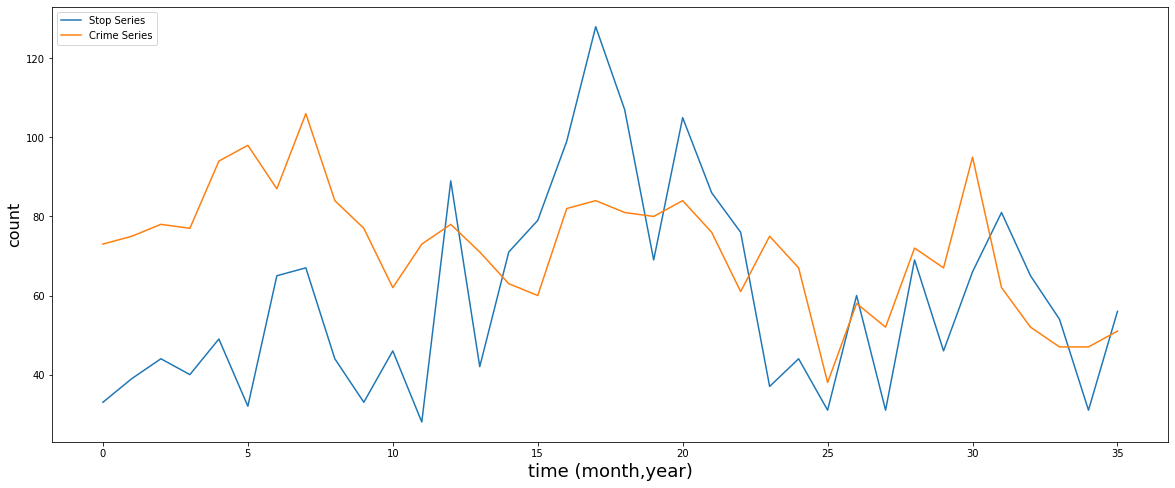

In [ ]:
   plotTimeSeries(1914)